<a href="https://colab.research.google.com/github/linhoangce/ml_with_pytorch_and_scikitlearn/blob/main/chapter5_6_practice_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recap chapter 4: Data Preprocessing

In [ ]:
!python --version

Python 3.11.13


In [ ]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0,'''

# StringIO creates an in-mem text buffer behaving like text file
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
StringIO(csv_data)

In [ ]:
# check for missing values per cell
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [ ]:
# same behavior as
df.isna()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [ ]:
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [ ]:
df.isna().sum()

,0
A,0
B,0
C,1
D,1


In [ ]:
# return NumPy arr with 'values`
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [ ]:
type(df.values)

numpy.ndarray

## Eliminate missing values from dataset

In [ ]:
# drop entire rows with missing values
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# specify axis, row
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# drop columns with NA
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
# only drop rows where all columns are NaN
# returns whole array here since we don't have
# any row with all NaNs
df.dropna(how='all')


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# adding a new col with all NaN
import numpy as np

df['E'] = np.nan
df

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,NaN,8.0,NaN
2,10.0,11.0,12.0,NaN,NaN


In [ ]:
df.dropna(how='all',
          axis=1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# add a new row at bottom filled with NaN
new_row = pd.DataFrame([[np.nan, np.nan, np.nan, np.nan, np.nan ]],
                       columns=df.columns)
new_row

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_1 = pd.concat([df, new_row],
                 ignore_index=True)
df_1

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,NaN,8.0,NaN
2,10.0,11.0,12.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_1.dropna(how='all')

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,NaN,8.0,NaN
2,10.0,11.0,12.0,NaN,NaN


In [ ]:
# drop by value threshold
df_1.dropna(thresh=4)

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN


In [ ]:
df_1.dropna(thresh=3, axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0
3,NaN,NaN


In [ ]:
# drop row with NaN for specified col
df_1.dropna(subset=['C'])

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
2,10.0,11.0,12.0,NaN,NaN


In [ ]:
df_1

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,NaN,8.0,NaN
2,10.0,11.0,12.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop rows with NaN for cols in specified range
df_1.dropna(subset=['C', 'E'],
            how='all')

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
2,10.0,11.0,12.0,NaN,NaN


## Imputing missing values

In [ ]:
# mean imputation with SimpleImputer
from sklearn.impute import SimpleImputer
import numpy as np

si = SimpleImputer(missing_values=np.nan,
                   strategy='mean')
si.fit(df_1.values)

imputed_data = si.transform(df_1.values)
imputed_data

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.5       ,  8.        ],
       [10.        , 11.        , 12.        ,  6.        ],
       [ 5.33333333,  6.33333333,  7.5       ,  6.        ]])

In [ ]:
# impute col A, B, C, D using mean
si_mean = SimpleImputer(missing_values=np.nan,
                        strategy='mean')
# exclude last col E
imputed_data = si_mean.fit_transform(df_1.iloc[:, :-1])
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.5       ,  8.        ],
       [10.        , 11.        , 12.        ,  6.        ],
       [ 5.33333333,  6.33333333,  7.5       ,  6.        ]])

In [ ]:
### impute col E with a constant

si_constant = SimpleImputer(missing_values=np.nan,
                            strategy='constant',
                            fill_value=0)
imputed_col_E = si_constant.fit_transform(df_1.iloc[:, -1].values.reshape(-1, 1))
imputed_col_E

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


array([[0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# adjust df
# convert arr to df
imputed_data = pd.DataFrame(imputed_data)
imputed_data.columns = ['A', 'B', 'C', 'D']
imputed_data

,A,B,C,D
0,1.000000,2.000000,3.0,4.0
1,5.000000,6.000000,7.5,8.0
2,10.000000,11.000000,12.0,6.0
3,5.333333,6.333333,7.5,6.0


In [ ]:
# Find the most frequent value(s) in each column of the DataFrame
most_frequent_values = df_1.mode()

print("Most frequent value(s) in the DataFrame (per column):")
display(most_frequent_values)

Most frequent value(s) in the DataFrame (per column):


,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,12.0,8.0,NaN
2,10.0,11.0,NaN,NaN,NaN


In [ ]:
# add col E back
imputed_data['E'] = imputed_col_E
imputed_data

,A,B,C,D,E
0,1.000000,2.000000,3.0,4.0,0.0
1,5.000000,6.000000,7.5,8.0,0.0
2,10.000000,11.000000,12.0,6.0,0.0
3,5.333333,6.333333,7.5,6.0,0.0


In [ ]:
# fill NaN values using DataFrame object
df_1.fillna(df.mean()).dropna(axis=1)

,A,B,C,D
0,1.000000,2.000000,3.0,4.0
1,5.000000,6.000000,7.5,8.0
2,10.000000,11.000000,12.0,6.0
3,5.333333,6.333333,7.5,6.0


## Hanndling categorical data

### Categorical encoding with pandas

In [ ]:
# create a sample dataframe
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])

# give columns names
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


#### Mapping ordinal features

In [ ]:
df['size']

,size
0,M
1,L
2,XL


In [ ]:
### manual mapping for ordinal feature 'size'

# create a mapping dict
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

# use dict to map
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [ ]:
# revert mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [ ]:
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


#### Encode class labels

In [ ]:
import numpy as np

class_mapping = {label: idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [ ]:
# revert mapping for class labels
inv_class_map = {v: k for k, v in class_mapping.items()}

df['classlabel'] = df['classlabel'].map(inv_class_map)

#### Encode labels with scikit-learn's `LabelEncoder`

In [ ]:
df['classlabel'].values

array(['class1', 'class2', 'class1'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder object
class_le = LabelEncoder()

# this object takes a numpy arr, not DataFrame object
# so convert it to numpy arr as appropriate
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [ ]:
# transform integer class labels back to original
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

#### One-hot encode on nomial features

In [ ]:
y = class_le.transform(df['classlabel'].values)
y

array([0, 1, 0])

In [ ]:
df['classlabel'] = y
df.values

array([['green', 1, 10.1, 0],
       ['red', 2, 13.5, 1],
       ['blue', 3, 15.3, 0]], dtype=object)

In [ ]:
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [ ]:
X[:, 0]

array(['green', 'red', 'blue'], dtype=object)

In [ ]:
# Convert string labels to integer labels with LabelEncoder
from sklearn.preprocessing import LabelEncoder

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [ ]:
X[:, 0].reshape(-1, 1)

array([[1],
       [2],
       [0]], dtype=object)

In [ ]:
# one-hot encode for blue = 1
from sklearn.preprocessing import OneHotEncoder

# convert to numpy array
X = df[['color', 'size', 'price']].values

# initialize OneHotEncoder object
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
# selectively transform columns in a multi-feature array
# modify only the first column
# leave other two columns untouched
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [ ]:
## A more convenient wayt to one-hot encode is to use
# `get_dummy` function from pandas
# default to boolean
pd.get_dummies(df[['price', 'size', 'color']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [ ]:
# specify numerical representation
pd.get_dummies(df[['price', 'size', 'color']],
               dtype=float)

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


In [ ]:
### reduce multi-collinearity/correlation among variables
### by droping the first class label column - blue
pd.get_dummies(df[['price', 'color', 'size']],
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [ ]:
# similar, drop first column in OneHotEncoder
color_ohe = OneHotEncoder(categories='auto',
                          drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### Optional: encode ordinal features

In [ ]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
    ])
df

,0,1,2,3
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [ ]:
df.columns = ['color', 'size', 'price', 'label']
df

,color,size,price,label
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [ ]:
# encode variables using value-threshold approach
# with custom lambda expression
df['x > M'] = df['size'].apply(
    lambda x: 1 if x in {'L', 'XL'} else 0
)
df['x = XL'] = df['size'].apply(
    lambda x: 1 if x == 'XL' else 0
)

# del df['size'] # delete column 'size'
df

,color,size,price,label,x > M,x = XL
0,green,M,10.1,class1,0,0
1,red,L,13.5,class2,1,0
2,blue,XL,15.3,class1,1,1


## Parition datasets

In [ ]:
# download Wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
print(f'Number of samples: {len(df_wine)}')

Number of samples: 178


In [ ]:
# label columns
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
# print(f'Class labels: {np.unique(df_wine['Class label'])}')
print(f"Class labels: {np.unique(df_wine['Class label'])}")

Class labels: [1 2 3]


In [ ]:
# all features
features = df_wine.iloc[:, 1:].values
features, features.shape, df_wine.shape

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 (178, 13),
 (178, 14))

In [ ]:
# labels
labels = df_wine.iloc[:, 0].values
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

#### Partion dataset into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

# extract features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0,
    stratify=y) # ensure both train and test sets have same class proportions

### Bring features onto the same scale

*   *x_norm = (x - x_min) / (x_max - x_min)*
*   *x_std = (x - mean(X)) / std(X)*



In [ ]:
### use normalization with MinMaxScaler (range 0 - 1)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
X_train[:2], X_train_norm[:2]

(array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
         8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
         2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
         1.235e+03]]),
 array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
         0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
         0.45744681, 0.28571429, 0.19400856],
        [0.6871345 , 0.15612648, 0.65359477, 0.43548387, 0.7654321 ,
         0.67931034, 0.50632911, 0.74      , 0.2943038 , 0.3250444 ,
         0.81914894, 0.63369963, 0.68259629]]))

In [ ]:
# standardize vs. normalize
ex = np.array([0, 1, 2, 3, 4, 5])
print(f'standardized: {(ex - ex.mean()) / ex.std()}')
print(f'normalized: {(ex - ex.min()) / (ex.max() - ex.min())}')

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
# standardize with StandardScaler
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train[:2], X_train_std[:2]

(array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
         8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
         2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
         1.235e+03]]),
 array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
         -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
         -0.20017028, -0.82164144, -0.62946362],
        [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
          1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
          1.33982592,  0.54931269,  1.47568796]]))

## L1 and L2 Regularization as penalties against model complexity

In [ ]:
# setting regularization mode for model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l1',
                        C=0.1,
                        solver='liblinear',
                        # multi_class='ovr' # deprecated
                        )

ovr = OneVsRestClassifier(estimator=lr,
                          n_jobs=-1,
                          verbose=0)
ovr.fit(X_train_std, y_train)
print(f'Training acc: {ovr.score(X_train_std, y_train)}')
print(f'Test acc: {ovr.score(X_test_std, y_test)}')

Training acc: 0.9596774193548387
Test acc: 0.9814814814814815


In [ ]:
ovr.predict(X_test_std), y_test

(array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3,
        2, 2, 2, 2, 1, 3, 3, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 2, 2,
        1, 2, 2, 3, 2, 3, 2, 2, 1, 1]),
 array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3,
        2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 2, 2,
        1, 2, 2, 3, 2, 3, 2, 2, 1, 1]))

In [ ]:
ovr.predict_proba(X_test_std)

array([[0.76703649, 0.09970881, 0.1332547 ],
       [0.06161228, 0.76577466, 0.17261306],
       [0.79256174, 0.10101127, 0.10642699],
       [0.60507629, 0.31896622, 0.07595749],
       [0.38091837, 0.55364064, 0.06544099],
       [0.2195063 , 0.2208064 , 0.55968729],
       [0.07328691, 0.67024965, 0.25646344],
       [0.20806222, 0.06235848, 0.7295793 ],
       [0.69865162, 0.17122824, 0.13012015],
       [0.15389837, 0.14108058, 0.70502105],
       [0.74856347, 0.13152101, 0.11991552],
       [0.12603036, 0.76932973, 0.10463992],
       [0.1560197 , 0.07893604, 0.76504426],
       [0.77210061, 0.1207821 , 0.10711729],
       [0.070944  , 0.31551713, 0.61353887],
       [0.07399405, 0.2811913 , 0.64481465],
       [0.5210198 , 0.42347066, 0.05550954],
       [0.6492108 , 0.24009451, 0.11069469],
       [0.11526375, 0.2291686 , 0.65556765],
       [0.40739608, 0.4929852 , 0.09961872],
       [0.84672608, 0.03611639, 0.11715753],
       [0.09487864, 0.20635632, 0.69876504],
       [0.

In [ ]:
# check weights and bias
for i, estimator in enumerate(ovr.estimators_):
  print(f'\nClassifier for Class {i+1}')
  print(f'Weights (coef_):\n {estimator.coef_}')
  print(f'Bias (intercept_):\n {estimator.intercept_}')


Classifier for Class 1
Weights (coef_):
 [[0.21967634 0.         0.         0.         0.         0.
  0.54267549 0.         0.         0.         0.         0.
  1.51422433]]
Bias (intercept_):
 [-0.3187271]

Classifier for Class 2
Weights (coef_):
 [[-0.76613149 -0.04057865  0.          0.          0.          0.
   0.          0.          0.         -0.82383889  0.00706493  0.064689
  -0.41589566]]
Bias (intercept_):
 [-0.09903228]

Classifier for Class 3
Weights (coef_):
 [[ 0.          0.          0.          0.          0.          0.
  -0.74272196  0.          0.          0.42944612 -0.31945482 -0.52012762
   0.        ]]
Bias (intercept_):
 [-0.81384023]


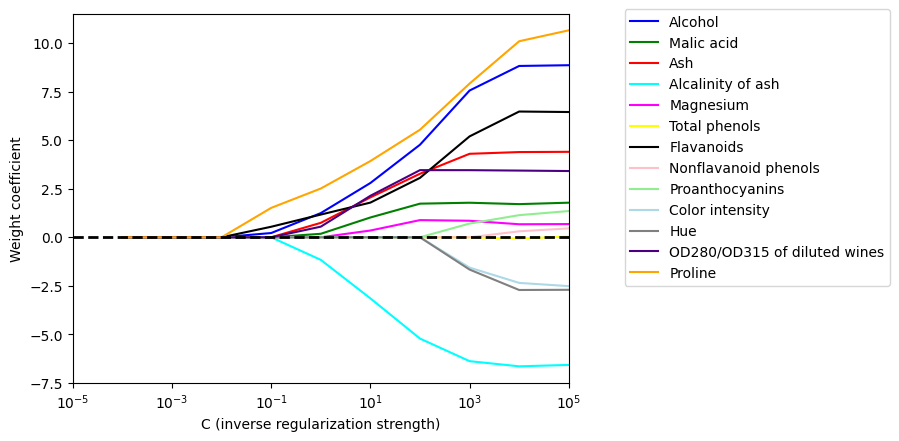

In [ ]:
# Vary regularization strength and plot regularization path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1',
                          C=10.0**c,
                          solver='liblinear',
                          random_state=0)
  ovr = OneVsRestClassifier(estimator=lr,
                            n_jobs=-1)
  ovr.fit(X_train_std, y_train)

  weights.append(ovr.estimators_[0].coef_[0])
  params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params,
           weights[:, column],
           label=df_wine.columns[column+1],
           color=color)

# draw a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [ ]:
ovr.estimators_[0].coef_[0].shape, ovr.estimators_[0].coef_.shape

((13,), (1, 13))

## Sequential Feature Selection Algorithms

### Selection Backward Selection (SBS)

Outline of SBS:
1. Initialize the algorithm with `k = d`, where *k* is the dimensionality of the full feature space, *X_d*.
2. Determine teh feature *x_*, that maximines the criterion: `x_ = argmax(X_k - x)`, where x is a member of X_k.
3. Remove the feature *x_* from the feature set: `X_k-1 = X_k - x_; k = k-1`
4. Terminate if *k* equals the number of desired features; otherwise, go to step 2.

In [ ]:
X_train.shape[1]

13

In [ ]:
indices = tuple(range(X_train.shape[1]))
subsets = [indices]
subsets

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]

In [ ]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

### Implementation of SBS
class SBS:
  def __init__(self, estimator, k_features,
               scoring=accuracy_score,
               test_size=0.25,
               random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = \
      train_test_split(X, y,
                       test_size=self.test_size,
                       random_state=self.random_state)

    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]

    score = self._calc_score(X_train, y_train,
                            X_test, y_test,
                            self.indices_)
    self.scores_ = [score]

    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_,
                            r=dim-1):
        score = self._calc_score(X_train, y_train,
                                X_test, y_test,
                                p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1

      self.scores_.append(scores[best])

    # store the score of the final subset
    # representing the best among subsets with self.k_features
    self.k_score_ = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self,
                  X_train, y_train,
                  X_test, y_test,
                  indices):
    self.estimator.fit(X_train[:, indices],
                       y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)

    return score

In [ ]:
### implement SBS with KNN classifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

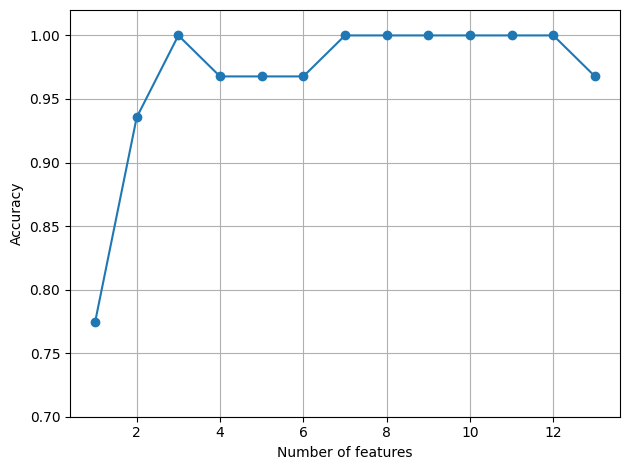

In [ ]:
# plot the implementation
k_features = [len(k) for k in sbs.subsets_]
plt.plot(k_features, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
sbs.k_score_

0.7741935483870968

#### Verify performance with subset k=3 (100%)

In [ ]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [ ]:
k3 = list(sbs.subsets_[10]) # index 10
k3

[0, 1, 11]

In [ ]:
df_wine.columns[1:]

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [ ]:
df_wine.columns[1:][k3]

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')

In [ ]:
# first, evaluate on complete feature set
knn.fit(X_train_std, y_train)
print(f'Training acc: {knn.score(X_train_std, y_train)}')
print(f'Test acc: {knn.score(X_test_std, y_test)}')

Training acc: 0.967741935483871
Test acc: 0.9629629629629629


In [ ]:
# Evaluate on the selected three-feature subset
from sklearn.neighbors import KNeighborsClassifier

knn_3f = KNeighborsClassifier(n_neighbors=5)
knn_3f.fit(X_train_std[:, k3], y_train)

print(f'Training acc: {knn_3f.score(X_train_std[:, k3], y_train)}')
print(f'Test acc: {knn_3f.score(X_test_std[:, k3], y_test)}')

Training acc: 0.9516129032258065
Test acc: 0.9259259259259259


### Assesing feature importance with random forests

 1) Proline                        0.181489
 2) Flavanoids                     0.175589
 3) Color intensity                0.147077
 4) OD280/OD315 of diluted wines   0.117707
 5) Alcohol                        0.114881
 6) Hue                            0.069422
 7) Total phenols                  0.057071
 8) Magnesium                      0.035363
 9) Malic acid                     0.028191
10) Alcalinity of ash              0.024528
11) Proanthocyanins                0.020501
12) Nonflavanoid phenols           0.014311
13) Ash                            0.013869


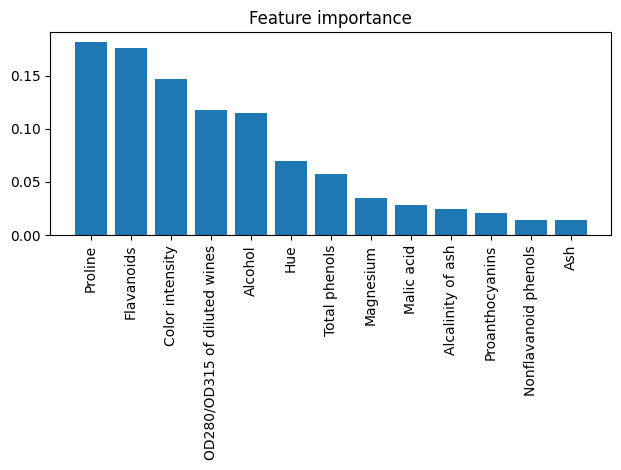

In [ ]:
# train forest of 500 trees on the Wine dataset
# rank 13 features by their respective importance measure
# no need for standardization/normalization of features
# feature importance values are normalized summed to 1.0
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # sort high to low

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],
           rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# reduce dataset to five most importance features from above
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,
                      threshold=0.1,
                      prefit=True)
X_selected = sfm.transform(X_train)
print(f'Number of features that meet this threshold criterion: {X_selected.shape[1]}')

for f in range(X_selected.shape[1]):
  print('%2d) %-*s %f' % (f+1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.181489
 2) Flavanoids                     0.175589
 3) Color intensity                0.147077
 4) OD280/OD315 of diluted wines   0.117707
 5) Alcohol                        0.114881


In [ ]:
# fit and evaluate model based on this new subset
from sklearn.neighbors import KNeighborsClassifier

knn_5f = KNeighborsClassifier(n_neighbors=5)
knn_5f.fit(X_selected, y_train)

print(f'Training acc: {knn_5f.score(X_selected, y_train)}')
print(f'Test acc: {knn_5f.score(sfm.transform(X_test), y_test)}')

Training acc: 0.8145161290322581
Test acc: 0.6851851851851852


In [ ]:
# let's try subset k = 7 (100%) on knn (top 7 here)
from sklearn.feature_selection import SelectFromModel

sfm_7 = SelectFromModel(forest,
                        threshold=0.05,
                        prefit=True)
X_selected_7 = sfm_7.transform(X_train)

knn_7f = KNeighborsClassifier(n_neighbors=5)
knn_7f.fit(X_selected_7, y_train)

print(f'Train acc: {knn_7f.score(X_selected_7, y_train)}')
print(f'Test acc: {knn_7f.score(sfm_7.transform(X_test), y_test)}')

Train acc: 0.8145161290322581
Test acc: 0.6851851851851852


In [ ]:
# let try a linear model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l1',
                        C=0.1,
                        solver='liblinear')
ovr = OneVsRestClassifier(estimator=lr,
                          n_jobs=-1)

ovr.fit(X_selected_7, y_train)

ovr.score(X_selected_7, y_train), ovr.score(sfm_7.transform(X_test), y_test)

(0.9193548387096774, 0.9074074074074074)

In [ ]:
# try subset k=7 from sbs
k7 = list(sbs.subsets_[6])
k7

[0, 1, 2, 3, 5, 7, 11]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_7f_sbs = KNeighborsClassifier(n_neighbors=5)
knn_7f_sbs.fit(X_train[:, k7], y_train)

print(f'Train acc: {knn_7f_sbs.score(X_train[:, k7], y_train)}')
print(f'Test acc: {knn_7f_sbs.score(X_test[:, k7], y_test)}')

Train acc: 0.9193548387096774
Test acc: 0.9444444444444444


# Chapter 5: Dimensionality Reduction

## Feature Extraction

### Extracting principal components

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# split data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# extract features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y
)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
### construct covariance matrix
import numpy as np

cov_mat = np.cov(X_train_std.T)

# get eigenvectors and eigenvalues
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f'Eigenvalues: \n{eigen_vals}')

Eigenvalues: 
[4.95336613 2.58534405 1.47381941 0.79910078 0.73285108 0.64807382
 0.53160065 0.08933116 0.15845469 0.34461981 0.22798792 0.26989904
 0.29124253]


In [ ]:
cov_mat.shape, eigen_vals.shape, eigen_vecs.shape

((13, 13), (13,), (13, 13))

### Total and explained variance

In [ ]:
sorted(eigen_vals, reverse=True)

[np.float64(4.953366129593148),
 np.float64(2.585344045444806),
 np.float64(1.4738194070372517),
 np.float64(0.7991007780392867),
 np.float64(0.7328510758629256),
 np.float64(0.648073824732679),
 np.float64(0.5316006471640666),
 np.float64(0.34461981184141804),
 np.float64(0.29124252577359794),
 np.float64(0.2698990432466313),
 np.float64(0.22798791967669324),
 np.float64(0.1584546903042136),
 np.float64(0.08933115819385855)]

In [ ]:
### calculate cumulative sum of explained variances
total = sum(eigen_vals)
total

np.float64(13.105691056910578)

In [ ]:
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
var_exp

[np.float64(0.3779553560421568),
 np.float64(0.1972688074377859),
 np.float64(0.11245644358907061),
 np.float64(0.060973570532774315),
 np.float64(0.05591853742626538),
 np.float64(0.04944980176310141),
 np.float64(0.040562580397754434),
 np.float64(0.026295432293110665),
 np.float64(0.0222225996713105),
 np.float64(0.02059403369685833),
 np.float64(0.017396100570864298),
 np.float64(0.012090525376810336),
 np.float64(0.006816211202136845)]

In [ ]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.37795536, 0.57522416, 0.68768061, 0.74865418, 0.80457272,
       0.85402252, 0.8945851 , 0.92088053, 0.94310313, 0.96369716,
       0.98109326, 0.99318379, 1.        ])

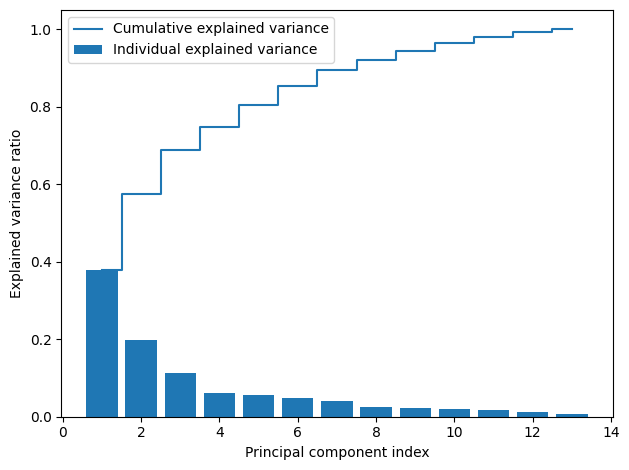

In [ ]:
import matplotlib.pyplot as plt

# plot the variance explained ratio of eigenvalues
plt.bar(range(1, 14),
        var_exp,
        align='center',
        label='Individual explained variance')
plt.step(range(1, 14),
         cum_var_exp,
         where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Feature Transformation

1. Select *k* eigenvectors, which corresponds to the *k* largest eigenvalues, where *k* is the dimensionality of the new feature subspace (k <= d).
2. Construct a projection matrix, W, from the "top" *k* eigen vectors.
3. Transform the dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace.

In [ ]:
# make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(np.float64(4.953366129593148),
  array([ 0.16880114, -0.24035801, -0.02255491, -0.24175836,  0.18942066,
          0.38371818,  0.4112112 , -0.318599  ,  0.31411645, -0.07688217,
          0.27920994,  0.3679408 ,  0.28833997])),
 (np.float64(2.585344045444806),
  array([-0.49100273, -0.29232824, -0.24383842,  0.0711549 , -0.24922936,
         -0.08311086,  0.02457002,  0.01674081,  0.00541254, -0.53288107,
          0.33901273,  0.16005813, -0.33836951])),
 (np.float64(1.4738194070372517),
  array([ 0.15196047, -0.0296952 , -0.67838595, -0.57682017, -0.20646538,
         -0.15717731, -0.15799207, -0.19232552, -0.14544651,  0.06680528,
         -0.08550691, -0.10459269,  0.09972586])),
 (np.float64(0.7991007780392867),
  array([-0.19346598, -0.33261077, -0.13923974, -0.05931794,  0.74878665,
         -0.21860883, -0.20822668,  0.07709233,  0.24463795,  0.06400593,
          0.10224607, -0.31118534,  0.0051725 ])),
 (np.float64(0.7328510758629256),
  array([ 0.07901191, -0.44201063,  

In [ ]:
eigen_pairs[0][1], eigen_pairs[0][1][:, np.newaxis]

(array([ 0.16880114, -0.24035801, -0.02255491, -0.24175836,  0.18942066,
         0.38371818,  0.4112112 , -0.318599  ,  0.31411645, -0.07688217,
         0.27920994,  0.3679408 ,  0.28833997]),
 array([[ 0.16880114],
        [-0.24035801],
        [-0.02255491],
        [-0.24175836],
        [ 0.18942066],
        [ 0.38371818],
        [ 0.4112112 ],
        [-0.318599  ],
        [ 0.31411645],
        [-0.07688217],
        [ 0.27920994],
        [ 0.3679408 ],
        [ 0.28833997]]))

In [ ]:
eigen_pairs[1][1], eigen_pairs[1][1][:, np.newaxis]

(array([-0.49100273, -0.29232824, -0.24383842,  0.0711549 , -0.24922936,
        -0.08311086,  0.02457002,  0.01674081,  0.00541254, -0.53288107,
         0.33901273,  0.16005813, -0.33836951]),
 array([[-0.49100273],
        [-0.29232824],
        [-0.24383842],
        [ 0.0711549 ],
        [-0.24922936],
        [-0.08311086],
        [ 0.02457002],
        [ 0.01674081],
        [ 0.00541254],
        [-0.53288107],
        [ 0.33901273],
        [ 0.16005813],
        [-0.33836951]]))

In [ ]:
# collect two eigenvectors corresponding to two largest eigenvalues
# which captures 60 percent of the variance in this dataset
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
w

array([[ 0.16880114, -0.49100273],
       [-0.24035801, -0.29232824],
       [-0.02255491, -0.24383842],
       [-0.24175836,  0.0711549 ],
       [ 0.18942066, -0.24922936],
       [ 0.38371818, -0.08311086],
       [ 0.4112112 ,  0.02457002],
       [-0.318599  ,  0.01674081],
       [ 0.31411645,  0.00541254],
       [-0.07688217, -0.53288107],
       [ 0.27920994,  0.33901273],
       [ 0.3679408 ,  0.16005813],
       [ 0.28833997, -0.33836951]])

In [ ]:
X_train_std[0], X_train_std[0].shape

(array([ 0.67135255, -0.53686175, -0.22339253, -0.97388785,  1.14216238,
         1.33725379,  1.22719502, -0.24769281,  1.42519621,  0.44983481,
        -0.07755622,  1.03643643,  0.09674244]),
 (13,))

In [ ]:
# tranform an example onto PCA subspace
X_train_std[0].dot(w)

array([ 2.59655778, -0.68244806])

In [ ]:
X_train_std.shape

(124, 13)

In [ ]:
# transform entire 124x3-dimensional training dataset
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

In [ ]:
X_train_pca[:5]

array([[ 2.59655778, -0.68244806],
       [ 2.14445181,  1.38684599],
       [ 2.17031576, -1.63412486],
       [ 0.31732087,  1.98885417],
       [-2.8962622 , -1.5001687 ]])

#### Visualize transformed data

In [ ]:
X_train_pca[y_train == 1][:5], X_train_pca[y_train == 1, 0][:5]

(array([[ 2.59655778, -0.68244806],
        [ 2.17031576, -1.63412486],
        [ 0.90659279, -0.4108847 ],
        [ 2.09223303, -1.1191262 ],
        [ 2.18983795, -0.99985928]]),
 array([2.59655778, 2.17031576, 0.90659279, 2.09223303, 2.18983795]))

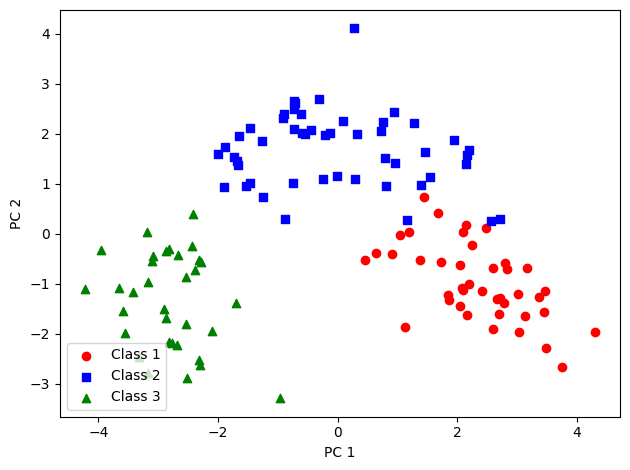

In [ ]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0], # first col - axis x
              X_train_pca[y_train == l, 1], # second col - axis y
              c=c, label=f'Class {l}',
              marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Principal Component Analysis in Scikit-learn

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y,
                          classifier,
                          test_idx=None,
                          resolution=0.02):
  # setup markers and color map
  markers = ['o', 's', '^', '<', 'V']
  colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']

  # construct color map based on the number of labels
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # extract min - max values of the first two features
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(),
                                     xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)

  plt.contourf(xx1,
               xx2,
               lab,
               alpha=0.3,
               cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='purple')

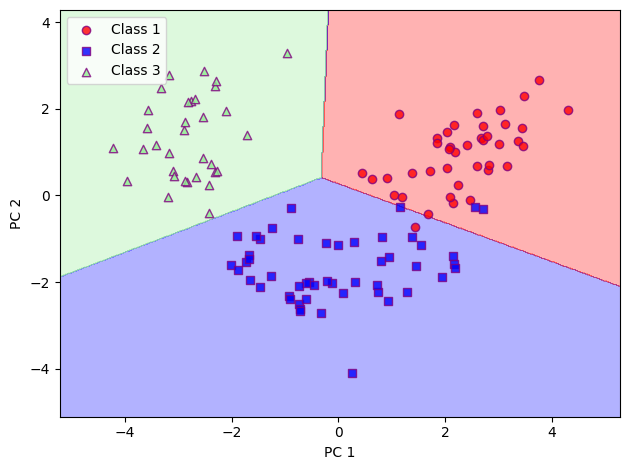

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

# initialize PCA transformer and log reg estimator
pca = PCA(n_components=2)
lr = LogisticRegression(C=0.1,
                        solver='lbfgs')
ovr = OneVsRestClassifier(estimator=lr,
                          n_jobs=-1)

# dimension reduced
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# fit the model on pca dataset
ovr.fit(X_train_pca, y_train)

# plot the result
plot_decision_regions(X=X_train_pca,
                      y=y_train,
                      classifier=ovr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

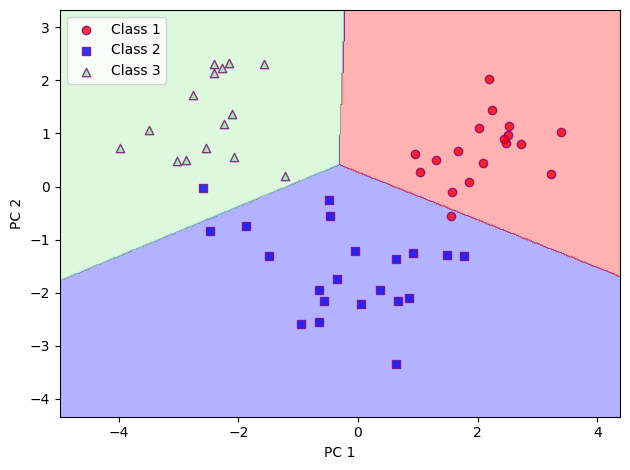

In [ ]:
# evaluate and plot test result
plot_decision_regions(X=X_test_pca,
                      y=y_test,
                      classifier=ovr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.37795536, 0.19726881])

In [ ]:
# to keep all features as principal components
# set `n_components` to None
from sklearn.decomposition import PCA

pca_all = PCA(n_components=None)
X_train_pca_all = pca_all.fit_transform(X_train_std)
pca_all.explained_variance_ratio_

array([0.37795536, 0.19726881, 0.11245644, 0.06097357, 0.05591854,
       0.0494498 , 0.04056258, 0.02629543, 0.0222226 , 0.02059403,
       0.0173961 , 0.01209053, 0.00681621])

### Assessing feature contributions

In [ ]:
# compute 13x13-dimensional loadings matrix
loadings = eigen_vecs * np.sqrt(eigen_vals)
loadings.shape

(13, 13)

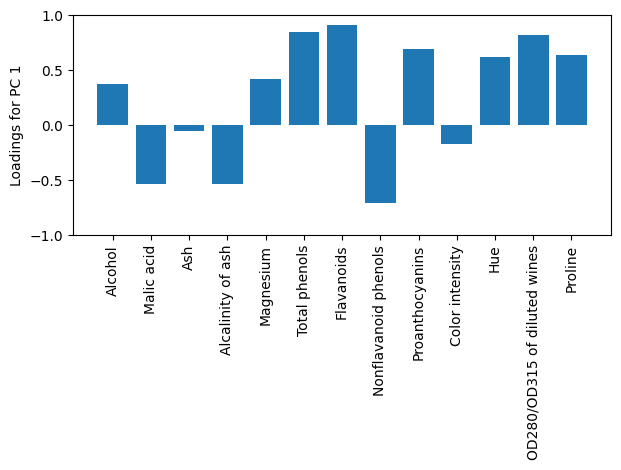

In [ ]:
# plot loadings for first principal component
fix, ax = plt.subplots()

ax.bar(range(13),
       loadings[:, 0],
       align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],
                   rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()


In [ ]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
sklearn_loadings

array([[ 0.37568651,  0.78948354],
       [-0.5349446 ,  0.47003472],
       [-0.05019857,  0.39206793],
       [-0.53806125, -0.11441001],
       [ 0.42157764,  0.40073602],
       [ 0.85400929,  0.13363399],
       [ 0.91519818, -0.03950616],
       [-0.709079  , -0.02691756],
       [ 0.69910256, -0.00870283],
       [-0.17111018,  0.85681975],
       [ 0.62141408, -0.54509874],
       [ 0.81889488, -0.25735754],
       [ 0.64173403,  0.54406451]])

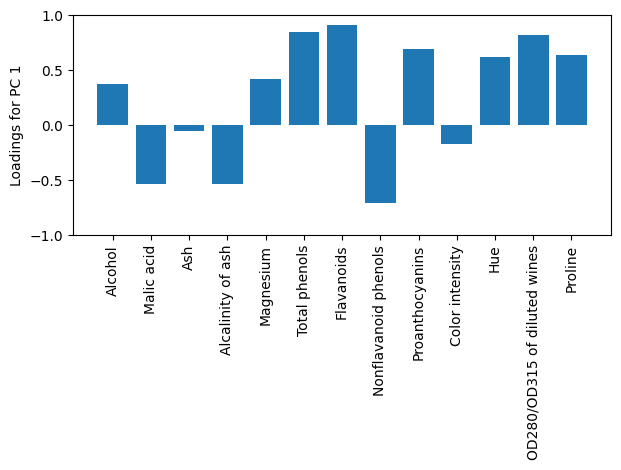

In [ ]:
# compare scikit-learn PCA loadings with previous loadings
fix, ax = plt.subplots()

ax.bar(range(13),
       sklearn_loadings[:, 0],
       align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],
                  rotation=90)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


## Supervised data compression via Linear Discriminant Analysis

The main steps of LDA:

1. Standardize the d-dimensional dataset (d is the number of features)
2. For each class, compute the d-dimensional mean vector.
3. Construct the between-class scatter matrix, and the within-class scatter matrix.
4. Compute the eigenvectors and corresponding eigenvalues of the matrix.
5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
6. Choose the *k* eigenvectors that correspond to the *k* largest eigenvalues to construct a *d*x*k*-dimensional transformation matrix, *w*, the eigenvectors are the columns of this matrix.
7. Project the examples onto the new feature subspace using the transformation matrix.


### Computing the scatter matrices

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [ ]:
# 1. Standardize datasets
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# 2. Compute mean vectos for each of three labels
import numpy as np

np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
  mean_vecs.append(np.mean(X_train_std[y_train==label],
                           axis=0))
  print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [ ]:
# 3.1 Compute within-class scatter matrix
d = 13 # number of features
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter

print(f'Within-class scatter matrix: {S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


In [ ]:
# 3.2 Compute scaled within-class matrix
d = 13
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter

S_W

array([[ 1.2448,  0.0967, -0.1276, -0.1105, -0.0726,  0.2374,  0.0753,
         0.0231,  0.1102,  0.4261,  0.1411, -0.0155,  0.1224],
       [ 0.0967,  2.2666,  0.1168,  0.3517, -0.2622, -0.0467, -0.0186,
         0.2194,  0.0187, -0.3939, -0.4167,  0.0787, -0.2492],
       [-0.1276,  0.1168,  2.6024,  1.6442,  0.5364,  0.3947,  0.3191,
         0.4553, -0.0353,  0.06  ,  0.167 ,  0.1987, -0.0081],
       [-0.1105,  0.3517,  1.6442,  2.1604,  0.325 ,  0.1535,  0.1222,
         0.273 , -0.0824, -0.068 ,  0.0336,  0.2548, -0.1201],
       [-0.0726, -0.2622,  0.5364,  0.325 ,  2.4397,  0.2384,  0.1433,
        -0.5166,  0.2566,  0.1445,  0.1777, -0.0058,  0.2509],
       [ 0.2374, -0.0467,  0.3947,  0.1535,  0.2384,  1.352 ,  0.6416,
        -0.0781,  0.7644,  0.4392,  0.0177,  0.4359,  0.1554],
       [ 0.0753, -0.0186,  0.3191,  0.1222,  0.1433,  0.6416,  0.6968,
        -0.2588,  0.5765,  0.3851, -0.0408,  0.2525,  0.0748],
       [ 0.0231,  0.2194,  0.4553,  0.273 , -0.5166, -0.0781, 

In [ ]:
S_W.shape

(13, 13)

In [ ]:
# 3.3 Compute between-class scatter matrix
mean_overall = np.mean(X_train_std, axis=0)
mean_overall, mean_overall.shape

(array([ 6.8901e-15,  1.6832e-16,  3.7997e-15,  2.8561e-16, -3.1785e-16,
         1.6626e-15,  1.5982e-16, -1.1989e-15,  1.8883e-15, -1.6152e-15,
        -5.7839e-16,  8.6311e-16, -1.3341e-16]),
 (13,))

In [ ]:
mean_overall = mean_overall.reshape(d, 1)
mean_overall, mean_overall.shape

(array([[ 6.8901e-15],
        [ 1.6832e-16],
        [ 3.7997e-15],
        [ 2.8561e-16],
        [-3.1785e-16],
        [ 1.6626e-15],
        [ 1.5982e-16],
        [-1.1989e-15],
        [ 1.8883e-15],
        [-1.6152e-15],
        [-5.7839e-16],
        [ 8.6311e-16],
        [-1.3341e-16]]),
 (13, 1))

In [ ]:
S_B = np.zeros((d, d))

for i, mv in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mv = mv.reshape(d, 1)
  S_B += n * (mv - mean_overall).dot((mv - mean_overall).T)

S_B.shape

(13, 13)

In [ ]:
S_B

array([[ 73.2779,   5.1521,  29.3409, -37.8053,  35.3288,  27.8688,
         24.4037, -10.917 ,  11.9293,  51.2816,   0.2198,  -0.3445,
         73.9711],
       [  5.1521,  33.8209,   5.5342,  17.6688,  -3.0595, -41.4067,
        -51.4514,  32.9397, -31.0444,  36.0237, -47.4845, -53.4785,
        -18.4551],
       [ 29.3409,   5.5342,  12.1084, -13.0286,  13.5707,   6.6597,
          4.2554,  -0.8742,   1.4687,  23.8967,  -4.84  ,  -5.6837,
         27.1642],
       [-37.8053,  17.6688, -13.0286,  31.8532, -21.5944, -40.7237,
        -44.8903,  26.1101, -25.5242,  -6.7623, -28.9705, -32.2968,
        -52.5343],
       [ 35.3288,  -3.0595,  13.5707, -21.5944,  17.9512,  20.621 ,
         20.5742, -10.8479,  11.0338,  19.3529,   7.9757,   8.6902,
         39.5823],
       [ 27.8688, -41.4067,   6.6597, -40.7237,  20.621 ,  66.8061,
         78.1916, -47.8401,  45.861 , -22.5142,  61.6487,  69.1515,
         58.7931],
       [ 24.4037, -51.4514,   4.2554, -44.8903,  20.5742,  78.1916,
  

### Selecting linear discriminant for the new feature subspace

In [ ]:
# 4. solve generalized eigenvalue problem of matrix
eigen_vals, eigen_vecs = np.linalg.eig(
    np.linalg.inv(S_W).dot(S_B)
)

# sort eigenvalues in descending order
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,
                     key=lambda k: k[0],
                     reverse=True)

for eigen_val in eigen_pairs:
  print(eigen_val[0])

349.61780890599397
172.7615221897938
3.277875948160424e-14
2.842170943040401e-14
2.6347620763320822e-14
2.6347620763320822e-14
1.7169492680170306e-14
1.7169492680170306e-14
1.674335053365992e-14
1.2740060380615543e-14
7.458378098449665e-15
4.737048557054326e-15
3.688843187314971e-15


In [ ]:
eigen_vals.real, eigen_vals

(array([ 2.8422e-14,  1.7276e+02,  3.4962e+02, -3.2779e-14, -1.1101e-14,
        -1.1101e-14, -1.6743e-14,  1.3422e-14,  1.3422e-14, -4.7370e-15,
         1.2740e-14,  3.6888e-15,  7.4584e-15]),
 array([ 2.8422e-14+0.0000e+00j,  1.7276e+02+0.0000e+00j,
         3.4962e+02+0.0000e+00j, -3.2779e-14+0.0000e+00j,
        -1.1101e-14+2.3895e-14j, -1.1101e-14-2.3895e-14j,
        -1.6743e-14+0.0000e+00j,  1.3422e-14+1.0707e-14j,
         1.3422e-14-1.0707e-14j, -4.7370e-15+0.0000e+00j,
         1.2740e-14+0.0000e+00j,  3.6888e-15+0.0000e+00j,
         7.4584e-15+0.0000e+00j]))

In [ ]:
sum(eigen_vals.real)

np.float64(522.3793310957878)

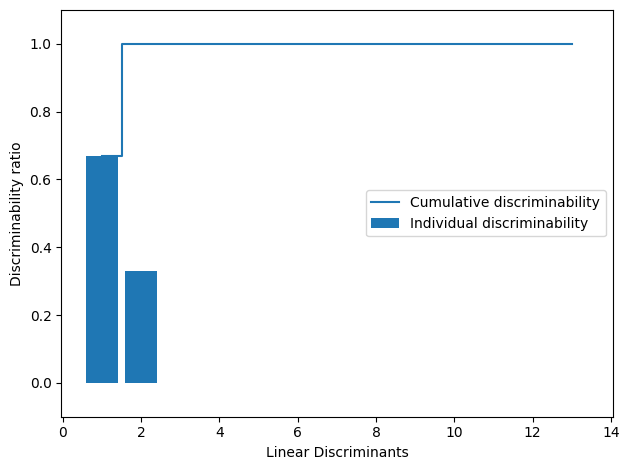

In [ ]:
# plot linear discriminant by decreasing eigenvalues
import matplotlib.pyplot as plt

total = sum(eigen_vals.real)
discr = [(i / total) for i in sorted(eigen_vals.real,
                                     reverse=True)]

cum_discr = np.cumsum(discr)
plt.bar(range(1, 14),
        discr,
        align='center',
        label='Individual discriminability')
plt.step(range(1, 14),
         cum_discr,
         where='mid',
         label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear Discriminants')
plt.ylim(-0.1, 1.1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# 6. stack two most discriminative eigenvectors columns
# to create transformation W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.1481, -0.4092],
       [ 0.0908, -0.1577],
       [-0.0168, -0.3537],
       [ 0.1484,  0.3223],
       [-0.0163, -0.0817],
       [ 0.1913,  0.0842],
       [-0.7338,  0.2823],
       [-0.075 , -0.0102],
       [ 0.0018,  0.0907],
       [ 0.294 , -0.2152],
       [-0.0328,  0.2747],
       [-0.3547, -0.0124],
       [-0.3915, -0.5958]])

In [ ]:
eigen_pairs[0], eigen_pairs[0][1], eigen_pairs[0][1][:, np.newaxis].real

((np.float64(349.61780890599397),
  array([-0.1481+0.j,  0.0908+0.j, -0.0168+0.j,  0.1484+0.j, -0.0163+0.j,
          0.1913+0.j, -0.7338+0.j, -0.075 +0.j,  0.0018+0.j,  0.294 +0.j,
         -0.0328+0.j, -0.3547+0.j, -0.3915+0.j])),
 array([-0.1481+0.j,  0.0908+0.j, -0.0168+0.j,  0.1484+0.j, -0.0163+0.j,
         0.1913+0.j, -0.7338+0.j, -0.075 +0.j,  0.0018+0.j,  0.294 +0.j,
        -0.0328+0.j, -0.3547+0.j, -0.3915+0.j]),
 array([[-0.1481],
        [ 0.0908],
        [-0.0168],
        [ 0.1484],
        [-0.0163],
        [ 0.1913],
        [-0.7338],
        [-0.075 ],
        [ 0.0018],
        [ 0.294 ],
        [-0.0328],
        [-0.3547],
        [-0.3915]]))

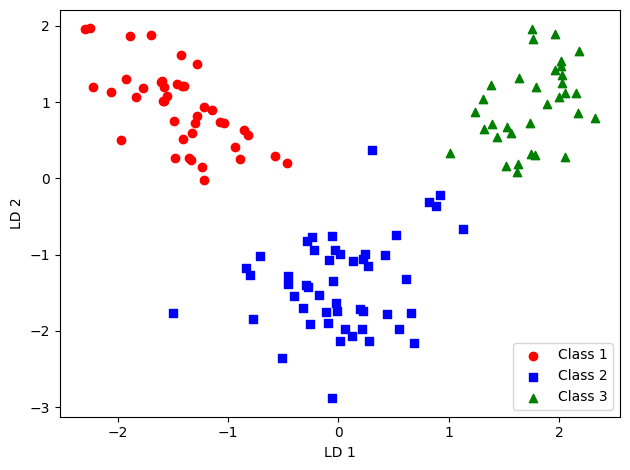

In [ ]:
# 7. project examples onto the new feature subspace
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train == l, 0],
              X_train_lda[y_train == l, 1] * (-1),
              c=c,
              label=f'Class {l}',
              marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# let's fit a linear model on this new data
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l2',
                        C=0.1,
                        solver='lbfgs')
ovr = OneVsRestClassifier(estimator=lr,
                          n_jobs=-1)

ovr.fit(X_train_lda, y_train)

ovr.score(X_train_lda, y_train), ovr.score(X_test_std.dot(w), y_test)

(0.9919354838709677, 1.0)

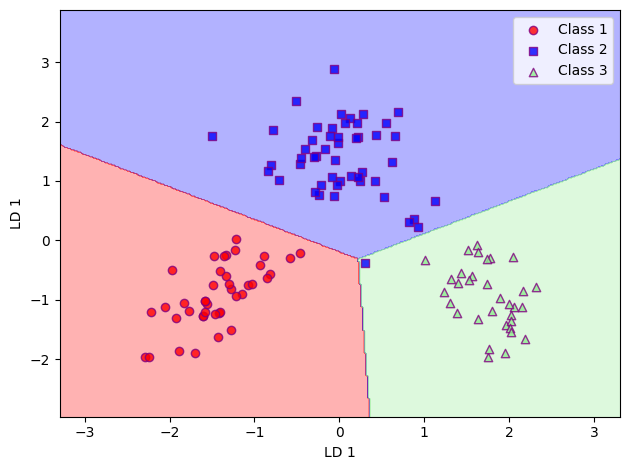

In [ ]:
plot_decision_regions(X=X_train_lda,
                      y=y_train,
                      classifier=ovr)
plt.xlabel('LD 1')
plt.ylabel('LD 1')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### LDA via scikit-learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda_sk = lda.fit_transform(X_train_std, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(penalty='l2',
                        C=0.1,
                        solver='lbfgs')
ovr = OneVsRestClassifier(estimator=lr,
                          n_jobs=-1)

ovr.fit(X_train_lda_sk, y_train)

print(f'Train acc: {ovr.score(X_train_lda_sk, y_train)}')
print(f'Test acc: {ovr.score(lda.transform(X_test_std), y_test)}')

Train acc: 1.0
Test acc: 1.0


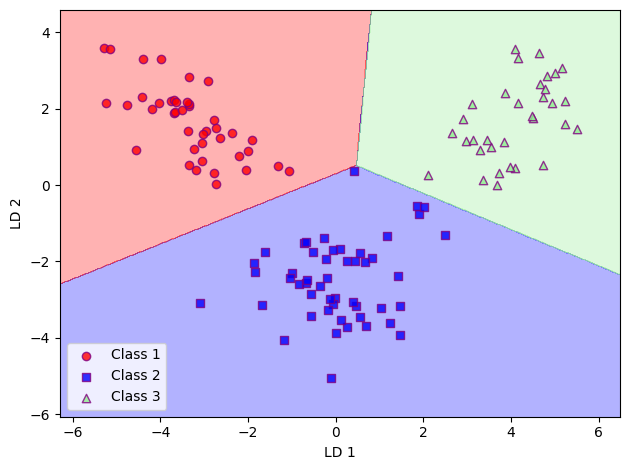

In [ ]:
plot_decision_regions(X=X_train_lda_sk,
                      y=y_train,
                      classifier=ovr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

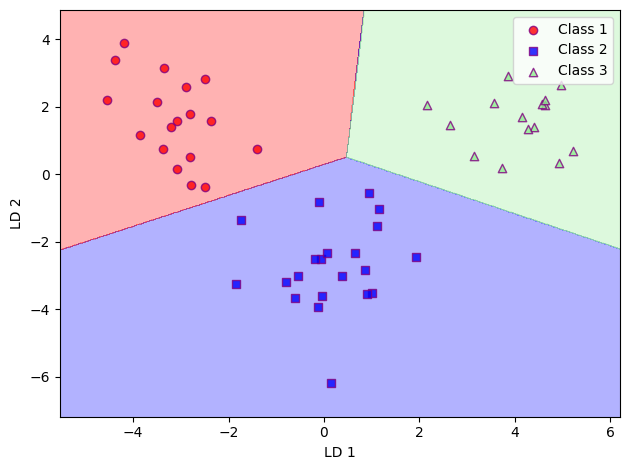

In [ ]:
plot_decision_regions(X=lda.transform(X_test_std),
                      y=y_test,
                      classifier=ovr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Non-linear dimensionality reduction and visualization

### Visualizing data via t-distributed stochastic neighbor embedding

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

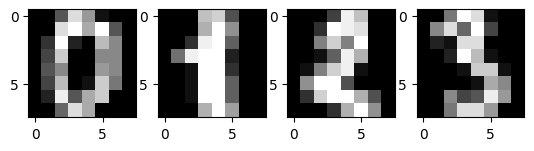

In [ ]:
# plot first 4 images
fix, ax = plt.subplots(1, 4)

for i in range(4):
  ax[i].imshow(digits.images[i],
               cmap='gray')
plt.show()

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
# extract features and labels
X_digits = digits.data
y_digits = digits.target

X_digits.shape, y_digits.shape

((1797, 64), (1797,))

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            init='pca')
X_digits_tsne = tsne.fit_transform(X_digits)
X_digits_tsne[:3], X_digits

(array([[ -2.9756, -53.811 ],
        [ 10.5327,  11.4978],
        [-13.2899,  18.6907]], dtype=float32),
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]))

#### Visualize 2D t-SNE embeddings

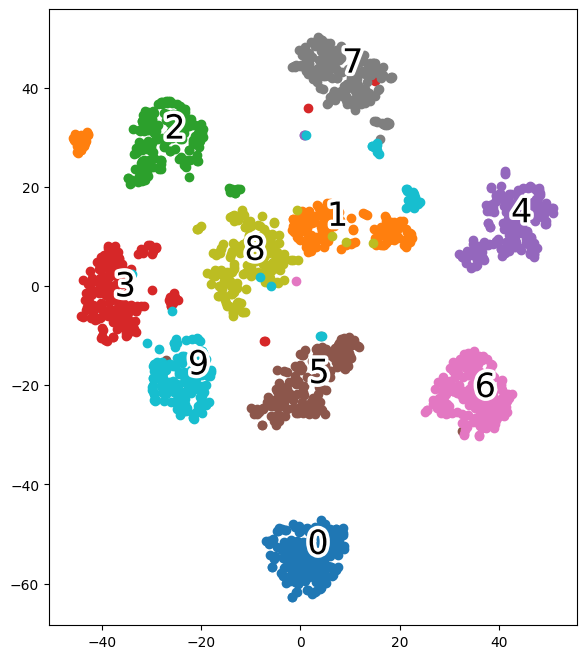

In [ ]:
import matplotlib.patheffects as PathEffects

def plot_projection(x, colors):
  f = plt.figure(figsize=(8, 8))
  ax = plt.subplot(aspect='equal')

  for i in range(10):
    plt.scatter(x[colors == i, 0],
                x[colors == i, 1])

  for i in range(10):
    xtext, ytext = np.median(x[colors == i, :],
                             axis=0)
    txt = ax.text(xtext,
                  ytext,
                  str(i),
                  fontsize=24)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground='w'),
        PathEffects.Normal()
    ])

plot_projection(X_digits_tsne, y_digits)
plt.show()

# Chapter 6: Finetuning best practices

## Streamlining workflows with pipelines

In [ ]:
# loading Breast Cancer Wisconsin dataset
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# extract features and labels
X, y = df.iloc[:, 2:].values, df.iloc[:, 1].values

In [ ]:
# encode label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)

len(X_train), len(X_test)

(455, 114)

### Combining transformers and estimators in a pipeline

In [ ]:
# chain StandardScaler, PCA, and LogisticRegression objects
# in a  pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
test_acc

0.9473684210526315

## Using k-fold cross-validation to assess model performance

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f'Fold: {k+1:02d}, '
        f'Class distr.: {np.bincount(y_train[train])}',
        f'Acc: {score:.3f}')

Fold: 01, Class distr.: [256 153] Acc: 0.891
Fold: 02, Class distr.: [256 153] Acc: 1.000
Fold: 03, Class distr.: [256 153] Acc: 0.978
Fold: 04, Class distr.: [256 153] Acc: 0.935
Fold: 05, Class distr.: [256 153] Acc: 0.913
Fold: 06, Class distr.: [257 153] Acc: 0.956
Fold: 07, Class distr.: [257 153] Acc: 0.956
Fold: 08, Class distr.: [257 153] Acc: 0.911
Fold: 09, Class distr.: [257 153] Acc: 0.956
Fold: 10, Class distr.: [257 153] Acc: 0.956


In [ ]:
# np.printoptions(precision=4)

np.array(scores).mean().item(), np.array(scores).std().item()

(0.945072463768116, 0.03119968936678407)

In [ ]:
# k-fold cross-validation scorer in scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)
scores

array([0.8913, 1.    , 0.9783, 0.9348, 0.913 , 0.9556, 0.9556, 0.9111,
       0.9556, 0.9556])

In [ ]:
scores.mean(), scores.std()

(np.float64(0.945072463768116), np.float64(0.03119968936678407))

## Debugging algorithms with learning and validation curves

### Diagnosing bias and variance problems with learning curves

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           max_iter=10000))
train_sizes, train_scores, test_scores = \
                      learning_curve(estimator=pipe_lr,
                                     X=X_train,
                                     y=y_train,
                                     train_sizes=np.linspace(0.1, 1.0, 10), # represents fractions of training data used each iter
                                     cv=10,
                                     n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

train_scores, train_mean

(array([[1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
         1.    , 1.    ],
        [1.    , 0.9877, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
         1.    , 1.    ],
        [1.    , 0.9918, 1.    , 0.9918, 0.9918, 0.9918, 0.9918, 0.9918,
         0.9918, 0.9918],
        [1.    , 0.9939, 1.    , 1.    , 0.9939, 0.9939, 0.9939, 0.9939,
         0.9939, 0.9939],
        [1.    , 1.    , 1.    , 1.    , 0.9951, 0.9951, 0.9951, 0.9951,
         0.9951, 0.9951],
        [0.9918, 0.9918, 0.9918, 0.9878, 0.9918, 0.9959, 1.    , 1.    ,
         1.    , 1.    ],
        [0.993 , 0.9895, 0.986 , 0.9825, 0.9895, 0.993 , 0.993 , 0.993 ,
         0.993 , 0.993 ],
        [0.9908, 0.9908, 0.9908, 0.9908, 0.9908, 0.9939, 0.9939, 0.9847,
         0.9878, 0.9878],
        [0.9918, 0.9918, 0.9918, 0.9891, 0.9918, 0.9946, 0.9946, 0.9891,
         0.9918, 0.9918],
        [0.9927, 0.9927, 0.9927, 0.9927, 0.9927, 0.9951, 0.9927, 0.9902,
         0.9927, 0.9927]]),
 array([

In [ ]:
train_scores.shape

(10, 10)

In [ ]:
test_std, train_std

(array([0.0227, 0.0279, 0.0244, 0.0193, 0.0226, 0.0205, 0.0155, 0.0183,
        0.0183, 0.0142]),
 array([0.    , 0.0037, 0.0033, 0.0028, 0.0024, 0.0044, 0.0035, 0.0027,
        0.0017, 0.0011]))

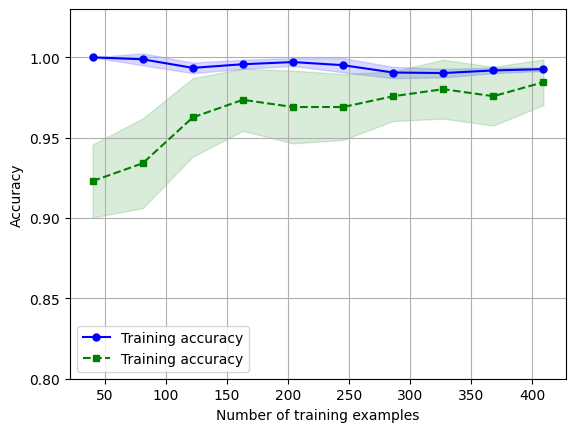

In [ ]:
# plot learning curve
plt.plot(train_sizes,
         train_mean,
         color='blue', marker='o',
         markersize=5,
         label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color='blue')
plt.plot(train_sizes,
         test_mean,
         color='green', marker='s',
         linestyle='--',
         markersize=5,
         label='Training accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim(0.8, 1.03)
plt.show()

### Address overfitting and underfitting with validation curves

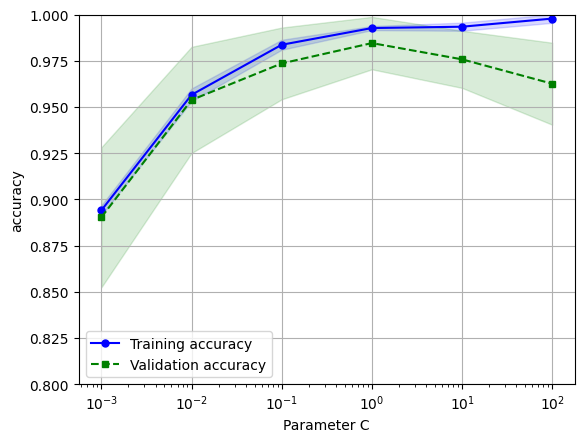

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1., 10., 100.]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range,
         train_mean,
         color='blue', marker='o',
         markersize=5,
         label='Training accuracy')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color='blue')
plt.plot(param_range,
         test_mean,
         color='green',
         linestyle='--',
         marker='s',
         markersize=5,
         label='Validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Parameter C')
plt.ylabel('accuracy')
plt.ylim(0.8, 1.0)
plt.show()

## Finetuning machine learning models via grid search

### Tuning hyperparameters via grid search

In [ ]:
# a brute-force exhaustive search paradigm
# where we specify a list of values for different hyperparameters
# the computer evaluates model performance for each combination
# to obtain the optimal combination of values (in this list)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

(np.float64(0.9779710144927536),
 {'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'})

In [ ]:
# evaluate performance of best selected model
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test acc: {clf.score(X_test, y_test)}')

Test acc: 0.9824561403508771


### Exploring hyperparameter configurations more widely with randomized seach

In [ ]:
import scipy as sp

param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

# distribution list with scipy
param_range_sp = sp.stats.loguniform(0.0001, 1000.0)


In [ ]:
# draw 100 random samples
param_range_sp.rvs(10)

array([2.0049e-02, 1.2185e+02, 2.2976e-03, 5.0831e-04, 3.5200e+00,
       1.6097e-01, 8.5941e+01, 9.4764e+01, 1.3028e-02, 4.4936e+02])

In [ ]:
# tune a SVM with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC())

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        n_jobs=-1)
rs = rs.fit(X_train, y_train)
rs.best_score_, rs.best_params_

(np.float64(0.9779710144927536),
 {'svc__kernel': 'rbf', 'svc__gamma': 0.0001, 'svc__C': 1000.0})

In [ ]:
rs.score(X_test, y_test)

0.9736842105263158

### More resource-efficient hyperparameter search with successive halving

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hs = HalvingRandomSearchCV(estimator=pipe_svc,
                           param_distributions=param_grid,
                           n_candidates='exhaust', # default, maximize resources
                           resource='n_samples', # default, training set size
                           factor=1.5, # how many candiates thrown out each round
                           n_jobs=-1)

hs = hs.fit(X_train, y_train)
hs.best_score_, hs.best_params_

(np.float64(0.9764705882352942), {'svc__kernel': 'linear', 'svc__C': 0.1})

In [ ]:
clf = hs.best_estimator_
clf.score(X_test, y_test)

0.9736842105263158

### Algorithm selection with nested cross-validation

In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(estimator=gs,
                         X=X_train,
                         y=y_train,
                         scoring='accuracy',
                         cv=10)
print(f'CV acc: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV acc: 0.971 +/- 0.022


In [ ]:
# compare a SVM model to a simple decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(estimator=gs,
                         X=X_train,
                         y=y_train,
                         scoring='accuracy',
                         cv=10)
print(f'CV acc: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

CV acc: 0.936 +/- 0.040
